# Création d’un outil d’estimation immobilière basé sur le machine learning : Cas du marché marocain

# Importation des bibliothéque

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# encoder /echelle de variable
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder ,MinMaxScaler, StandardScaler


# Partie 1: Chargement des données

In [416]:
#1-Importer les données à l’aide de pandas
df = pd.read_csv('appartements-data.csv')

#2-Vérifier le type et la structure des colonnes (df.info() et df.head()).
df.info()#permet de donne les collone exixst et aussi le type de chaque collone
#print(df.head()) #permet de donner les 5 premier ligne de tableau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


# Partie 2: Analyse exploratoire des données (EDA)

In [417]:
#** 1-Comprendre la structure générale du jeu de données (types, dimensions, aperçus).

#^^ type deux méthodes :
print("le types des données est :")
print(df.dtypes)
print(f"**** le type de salon est : {df['salon'].dtypes} *****")

#^^ pour les dimention de data

print(f"**** la dimention des données est : {df.shape} *****")

#^^ pour apercus just les nom des columns 
print(f"**** lles nom des columns : {list(df.columns)} ***** ")

#2-Identifier les valeurs manquantes et les doublons.

print(f"les Valeurs manquantes sont :{df.isna().sum()}")
print(f"les Valeurs doublent  sont : {df.duplicated().sum()}")


le types des données est :
title            object
price            object
city_name        object
salon           float64
nb_rooms        float64
nb_baths        float64
surface_area    float64
equipment        object
link             object
dtype: object
**** le type de salon est : float64 *****
**** la dimention des données est : (1773, 9) *****
**** lles nom des columns : ['title', 'price', 'city_name', 'salon', 'nb_rooms', 'nb_baths', 'surface_area', 'equipment', 'link'] ***** 
les Valeurs manquantes sont :title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64
les Valeurs doublent  sont : 41


['salon', 'nb_rooms', 'nb_baths', 'surface_area']
*************** statistiques ************
             salon     nb_rooms     nb_baths   surface_area
count  1620.000000  1490.000000  1480.000000    1742.000000
mean      1.267284     2.379195     2.307432     174.933410
std       0.557539     0.667159     7.629128    2969.500693
min       0.000000     1.000000     0.000000       1.000000
25%       1.000000     2.000000     1.000000      71.000000
50%       1.000000     2.000000     2.000000      89.000000
75%       1.000000     3.000000     2.000000     114.750000
max       8.000000     7.000000   134.000000  123456.000000
** matrice de corrélation
                 salon  nb_rooms  nb_baths  surface_area
salon         1.000000  0.304830  0.020866     -0.002076
nb_rooms      0.304830  1.000000  0.047500      0.618032
nb_baths      0.020866  0.047500  1.000000      0.040730
surface_area -0.002076  0.618032  0.040730      1.000000


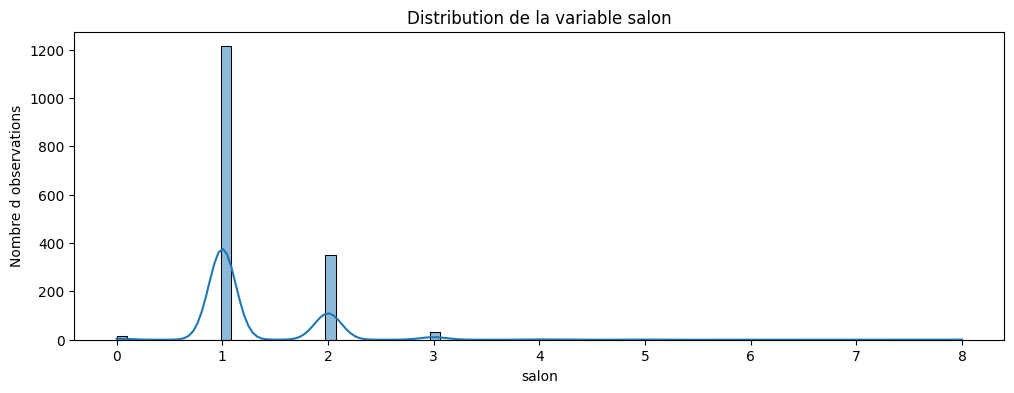

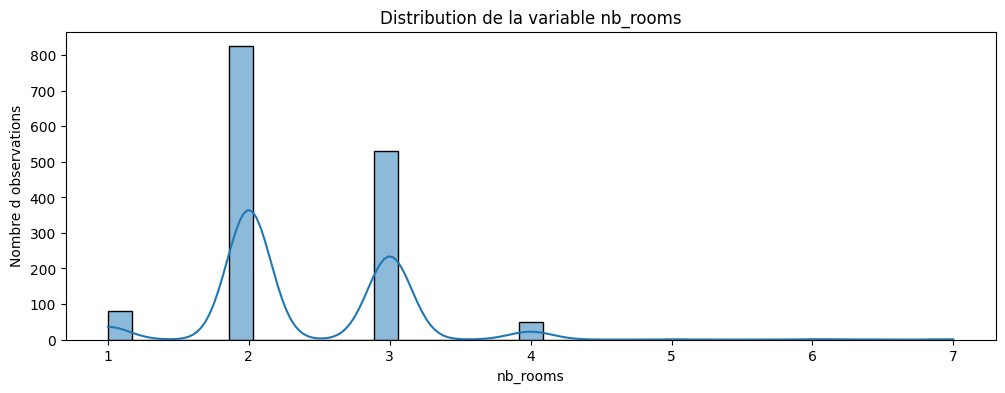

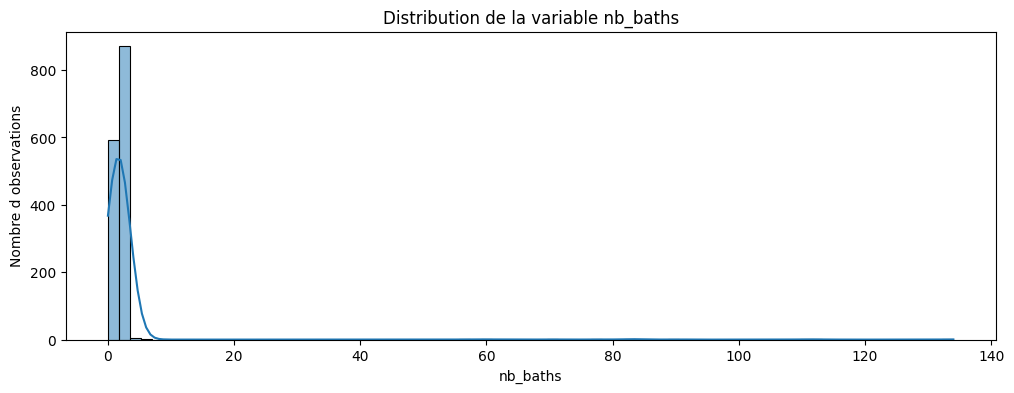

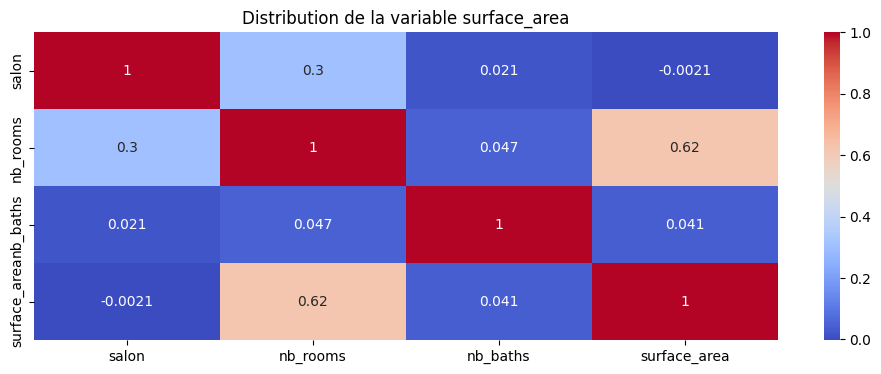

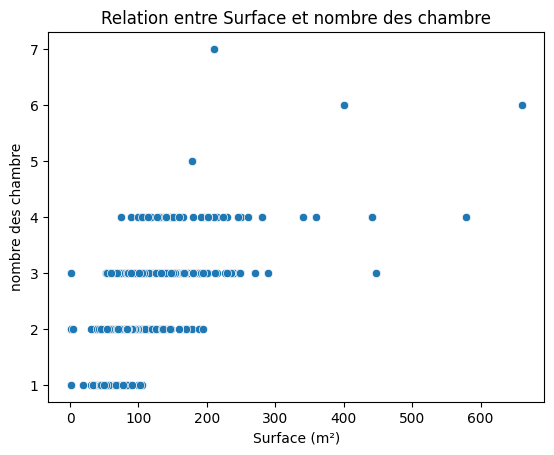

In [418]:
#**
#** 3-Analyser la distribution des variables numériques.
#^ 1- Lister toutes les colonnes numériques (donc la separation des data )

df_numeric = df.select_dtypes(include=['number']).columns.tolist()
print(df_numeric)

#^ 2- Pour chaque variable numérique il faut calculer (min - max - Moyenne -median )

# for data in df_numeric :
    
#     print(f"la moyenne  de {data} est : {df[data].mean():.2f}")
#     print(f"le mediane  de {data} est : {df[data].median()}")
#     print(f"le min  de {data} est : {df[data].min()}")
#     print(f"le max  de {data} est : {df[data].max()}")
print("*************** statistiques ************")
print(df.describe())

#^ 3- Distribution visuelle
for data in df_numeric:

    plt.figure(figsize=(12, 4))
    #trace un histogramme
    sns.histplot(df[data], kde=True)
    plt.title(f'Distribution de la variable {data}')
    plt.xlabel(data)
    plt.ylabel('Nombre d observations')
    # plt.show()

#** Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations
#les valeur entre -1 et 1
corr_matrix = df[df_numeric].corr()
print("** matrice de corrélation")
print(corr_matrix)


# Visualisation : heatmap de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# #Scatterplot entre deux variables importantes (exemple : surface vs prix)
sns.scatterplot(x=df['surface_area'], y=df['nb_rooms'])

plt.title('Relation entre Surface et nombre des chambre')
plt.xlabel('Surface (m²)')
plt.ylabel('nombre des chambre')
plt.show()

# partie 3: Prétraitement des données

In [419]:
#
#** 1- Nettoyage & Transformation: 

#^^Extraire les équipements (equipment) dans des colonnes booléennes à l’aide de str.get_dummies().
equipment_bool = df["equipment"].str.get_dummies(sep="/")

df = pd.concat([df, equipment_bool], axis=1)

#^^Convertir la colonne price (de type objet) en type float, en supprimant les caractères non numériques.
# df['price'] = df['price'].str.replace('DH', '').str.replace(' ', '')

df['price'] = df['price'].str.replace(r'[^\d]', '', regex=True)
df['price'] = df['price'].astype(float)
df["price"]
#^^  Supprimer les colonnes inutiles telles que equipment et link.
df = df.drop('link', axis=1)
df = df.drop('equipment', axis=1)

print(list(df.columns))

#^^Traitement de la colonne city_name. Uniformiser les noms de villes : convertir les noms en arabe vers leur équivalent français.
traduction_villes = {
    'الرباط': 'Rabat',
    'الدار البيضاء': 'Casablanca',
    'فاس': 'Fès',
    'مراكش': 'Marrakech',
    'أكادير': 'Agadir'
}
print(traduction_villes)
df['city_name'] = df['city_name'].replace(traduction_villes)

print(df["city_name"][1399])
#^^Remplacer les valeurs manquantes dans city_name par "Unknown".
df['city_name'] = df['city_name'].fillna('Unknown')

['title', 'price', 'city_name', 'salon', 'nb_rooms', 'nb_baths', 'surface_area', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']
{'الرباط': 'Rabat', 'الدار البيضاء': 'Casablanca', 'فاس': 'Fès', 'مراكش': 'Marrakech', 'أكادير': 'Agadir'}
Agadir


In [420]:
#
#** 2- Gestion des valeurs manquantes:

#^^Pour les colonnes numériques : imputer les valeurs manquantes par la médiane.
df_numeric = df.select_dtypes(include=['number']).columns.to_list()
print(f"les valeur numeriques sont :{df_numeric}")

print(df.shape)
for val in df_numeric:
    if val =="price":
        df = df.dropna(subset=['price'])
    else:
        median = df[val].median()
        df[val] = df[val].fillna(median)
        
print(df.shape)

#^^Pour les colonnes catégorielles (chaînes de caractères) : imputer avec "Unknown".
df_categorie = df.select_dtypes(include=['object']).columns.to_list()
print(f"les valeur categorial sont :{df_categorie}")

for val in df_categorie :
    df[val]=df[val].fillna("unknown")


les valeur numeriques sont :['price', 'salon', 'nb_rooms', 'nb_baths', 'surface_area', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']
(1773, 18)
(1490, 18)
les valeur categorial sont :['title', 'city_name']


  - Lignes supprimées : 96


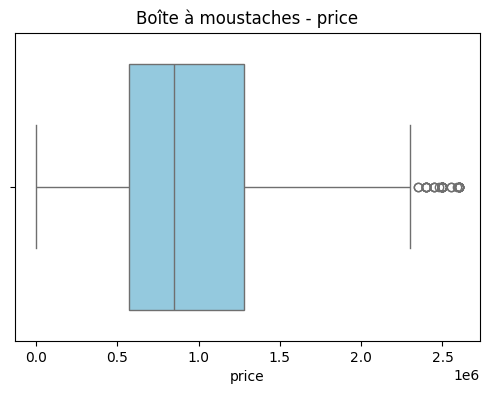

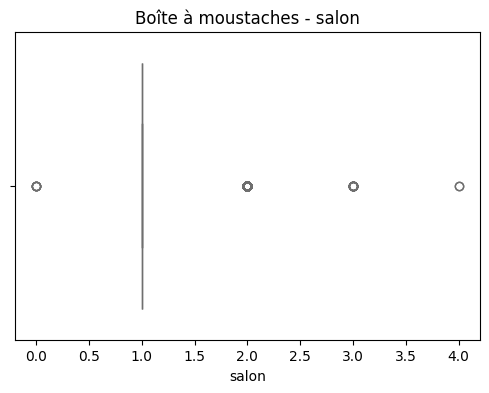

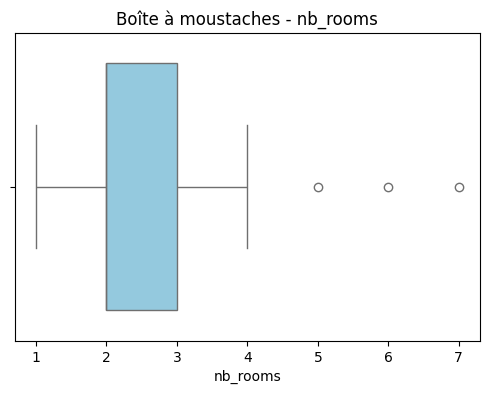

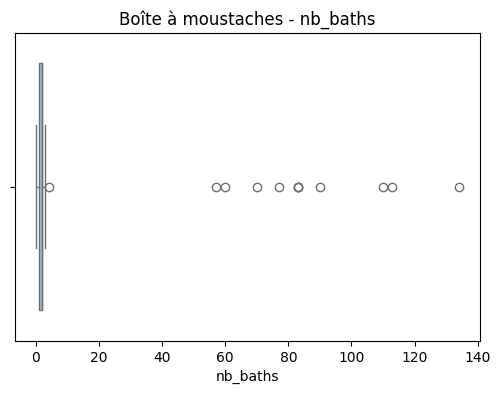

(1394, 18)


In [421]:
#
# ** 3- Détection et suppression des valeurs aberrantes:

#^^ Utiliser des méthodes statistiques (boîtes à moustaches, z-score, IQR) pour détecter les outliers.
# for val in df_numeric:
    
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(x=df[val], color='skyblue')
#     plt.title(f'Boîte à moustaches - {val}')
#     plt.show()
#pour les outliers 
for val in df_numeric:
    Q1 = df[val].quantile(0.25)
    Q3 = df[val].quantile(0.75)
    IQR = Q3 - Q1
 
    min_point = Q1 - 1.5 * IQR
    max_point = Q3 + 1.5 * IQR


    outliers = (df[val] < min_point) | (df[val] > max_point) #true false
    nombre_outliers = outliers.sum()
    #print(f"Nombre d'outliers pour {val} : {nombre_outliers}")
 

    if val == 'price':  
        
        df_avant = df.shape[0]
        df = df[~outliers].copy()
        df_apres = df.shape[0]
        print(f"  - Lignes supprimées : {df_avant - df_apres}")
        
    # else:
    #     median_val = df[val].median()
    #     df.loc[outliers, val] = median_val

            
    # outliers = (df[val] < min_point) | (df[val] > max_point) #true false
    # nombre_outliers = outliers.sum()
    # print(f"Nombre d'outlier final {val} : {nombre_outliers}")
        
           
for i in range(4):
    val = df_numeric[i]
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[val], color='skyblue')
    plt.title(f'Boîte à moustaches - {val}')
    plt.show()           
    
print(df.shape)


In [422]:
# 
#** 4- Encodage des variables catégorielles:

#^^ Appliquer un Label Encoding selon le modèle utilisé, en particulier sur city_name.
encoder = LabelEncoder()
df['city_name_encoded'] = encoder.fit_transform(df['city_name'])
df[['city_name','city_name_encoded']].head(10)

,city_name,city_name_encoded
0,Casablanca,12
1,Casablanca,12
2,Dar Bouazza,14
3,Casablanca,12
6,Marrakech,30
7,Casablanca,12
8,Asilah,4
9,Casablanca,12
10,Bouskoura,8
11,Kénitra,29


In [423]:
#
# ** 5- Mise à l’échelle des variables:

#^^Appliquer une normalisation (MinMaxScaler) ou une standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles.
#outliers :oui : StandardScaler ,Non :MinMaxScaler
X = df[df_numeric]

print("avec Minscaller")
scaler = MinMaxScaler()  # Par défaut : range=[0,1]
normalisation = scaler.fit_transform(X)

# Convertir en DataFrame pour mieux visualiser
normalisation = pd.DataFrame(normalisation, columns=df_numeric)
normalisation.head()

# print("avec standael")
# X = df[df_numeric]
# scaler = StandardScaler()
# normalisation = scaler.fit_transform(X)
# normalisation = pd.DataFrame(normalisation, columns=df_numeric)
# print(normalisation.head(10))

avec Minscaller


,price,salon,nb_rooms,nb_baths,surface_area,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,0.769228,0.25,0.166667,0.014925,0.418546,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.459608,0.25,0.166667,0.014925,0.243108,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.519224,0.25,0.166667,0.014925,0.200501,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.346145,0.25,0.000000,0.007463,0.137845,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.292298,0.25,0.333333,0.022388,0.243108,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


price              1.000000
surface_area       0.519679
Ascenseur          0.333753
nb_rooms           0.293186
Parking            0.243903
Climatisation      0.226307
Concierge          0.214288
Chauffage          0.190903
Terrasse           0.189927
salon              0.170595
Balcon             0.136928
Sécurité           0.130121
Cuisine Équipée    0.118028
Meublé             0.074839
Duplex             0.062369
nb_baths           0.009336
Name: price, dtype: float64


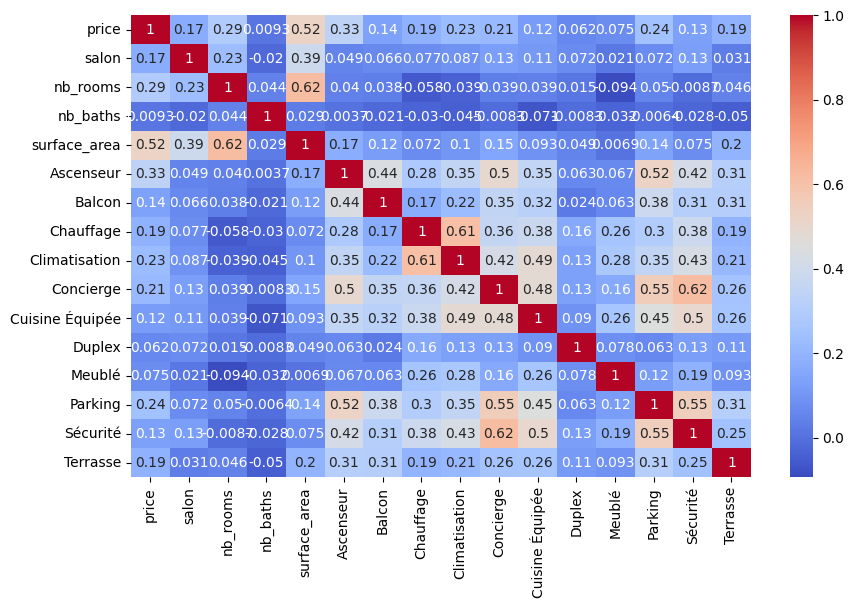

Variables sélectionnées: ['surface_area', 'Ascenseur', 'nb_rooms', 'Parking', 'Climatisation', 'Concierge', 'Chauffage', 'Terrasse', 'salon']


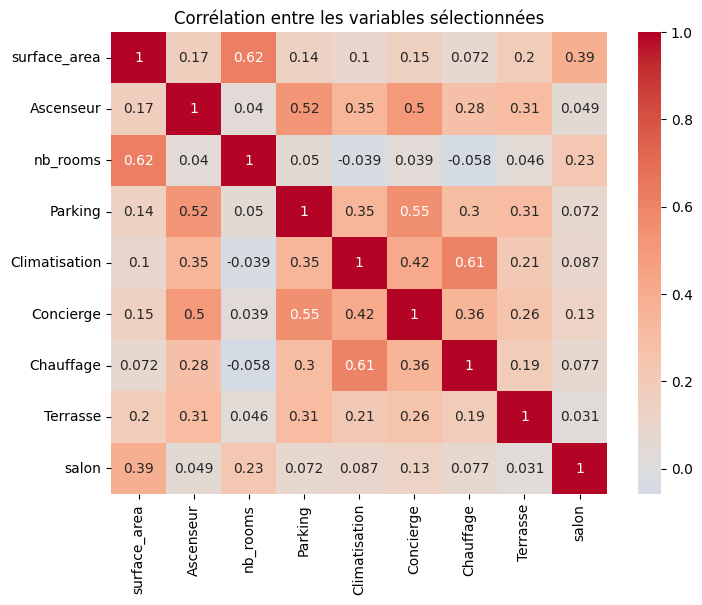

In [424]:
#
# ** 6-Sélection des variables explicatives:

#^^ Choisir les variables numériques corrélées au prix (corr > 0.15).

prix_correlation = normalisation.corr()["price"].abs().sort_values(ascending=False)
print(prix_correlation)


plt.figure(figsize=(10, 6))
sns.heatmap(normalisation.corr(), annot=True, cmap="coolwarm")
plt.show()


selected_features = prix_correlation[prix_correlation > 0.15].index.tolist()
selected_features.remove("price")  
print("Variables sélectionnées:", selected_features)

#^^ Vérifier que les variables choisies ne sont pas fortement corrélées entre elles pour éviter la redondance.

correlation_selected = normalisation[selected_features].corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_selected, annot=True, cmap="coolwarm", center=0)
plt.title("Corrélation entre les variables sélectionnées")
plt.show()

for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):
        corr_value = correlation_selected.iloc[i, j]
        if abs(corr_value) > 0.8:
            print(f"Attention: {selected_features[i]} et {selected_features[j]} sont fortement corrélées: {corr_value:.3f}")

In [425]:
#
# **7- Séparation des données

# Définir la variable cible et les variables explicatives
y = normalisation["price"]
X = normalisation[selected_features]

# Diviser en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille ensemble d'entraînement: {X_train.shape}")
print(f"Taille ensemble de test: {X_test.shape}")

Taille ensemble d'entraînement: (1115, 9)
Taille ensemble de test: (279, 9)
